# 1.ROI(Region of Interest)

In [9]:
import cv2
import numpy as np

img=cv2.imread('./img/sunset.jpg')

x=320
y=150
w=50
h=50

roi=img[y:y+h,x:x+w]
print(roi.shape)
cv2.rectangle(roi,(0,0),(h-1,w-1),(0,255,0))
cv2.imshow("img",img)

cv2.waitKey(0)
cv2.destroyAllWindows()

(50, 50, 3)


In [10]:
import cv2
import numpy as np

img=cv2.imread('./img/sunset.jpg')

x=320
y=150
w=50
h=50

roi=img[y:y+h,x:x+w]
img2=roi.copy()
img[y:y+h,x:x+w]=roi
cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0))
cv2.imshow("img",img)
cv2.imshow('roi',img2)

cv2.waitKey(0)
cv2.destroyAllWindows()

## 마우스로 관심영역 지정

In [15]:
import cv2
import numpy as np

isDragging=False
x0,y0,w,h=-1,-1,-1,-1
blue,red=(255,0,0),(0,0,255)

def onMouse(event,x,y,flags,param):
    global isDragging,x0,y0,img
    if event==cv2.EVENT_LBUTTONDOWN: # 마우스 왼쪽버튼 = 드래그 시작
        isDragging=True
        x0=x
        y0=y
    elif event==cv2.EVENT_MOUSEMOVE:
        if isDragging:
            img_draw=img.copy()
            cv2.rectangle(img_draw,(x0,y0),(x,y),blue,2)
            cv2.imshow('img',img_draw)
    elif event==cv2.EVENT_LBUTTONUP: #드래그 중지
        if isDragging:
            isDragging=False
            w=x-x0
            h=y-y0
            print("x:%d, y:%d, w:%d, h:%d"%(x0,y0,w,h))
            if w>0 and h>0:
                img_draw=img.copy()
                cv2.rectangle(img_draw,(x0,y0),(x,y),red,2)
                cv2.imshow('img',img_draw)
                roi=img[y0:y0+h,x0:x0+w]
                cv2.imshow('cropped',roi)
                cv2.moveWindow('cropped',0,0)
                cv2.imwrite('./cropped.jpg',roi)
                print("cropped")
    else:
        cv2.imshow('img',img)
        print("좌측 상단에서 우측 하단으로 영역을 드래그하세요")

img=cv2.imread('../screen.png')
cv2.imshow('img',img)
cv2.setMouseCallback('img',onMouse)
cv2.waitKey()
cv2.destroyAllWindows()

        

x:274, y:339, w:0, h:0
x:0, y:557, w:0, h:0
x:339, y:340, w:0, h:0
x:634, y:585, w:0, h:0


In [8]:
import cv2
import numpy as np

img=cv2.imread('./img/sunset.jpg')

x,y,w,h=cv2.selectROI('img',img,False)
if w and h:
    roi=img[y:y+h,x:x+w]
    cv2.imshow('cropped',roi)
    cv2.moveWindow('cropped',0,0)
    cv2.imwrite('./cropped2.jpg',roi)

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 지정 후 'Spacebar' 클릭시 ROI좌표 지정
# 'C'를 클릭시 ROI좌표 취소

# 2.Color Space

### RGB,BGR,RGBA

In [2]:
import cv2
import numpy as np

img=cv2.imread('./img/opencv_logo.png')
bgr=cv2.imread('./img/opencv_logo.png',cv2.IMREAD_COLOR)
bgra=cv2.imread('./img/opencv_logo.png',cv2.IMREAD_UNCHANGED)

print("Default:",img.shape,'BGR:',bgr.shape,'BGRA:',bgra.shape)

cv2.imshow('bgr',bgr)
cv2.imshow('bgra',bgra)
cv2.imshow('alpha',bgra[:,:,3]) # 알파 채널
cv2.waitKey(0)
cv2.destroyAllWindows()


Default: (120, 98, 3) BGR: (120, 98, 3) BGRA: (120, 98, 4)


### color space convert

In [1]:
import cv2
import numpy as np

img=cv2.imread('./img/girl.jpg')
img2=img.astype(np.uint16)
b,g,r=cv2.split(img2) # 채널별 분리 == >  b,g,r= img2[:,:,0],img2[:,:,1],img2[:,:,2]
gray1=((b+g+r)/3).astype(np.uint8) # 평균으로 grayscale 구하기

gray2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #cvtColor 함수로 grayscale 구하기

cv2.imshow('original',img)
cv2.imshow('gray1',gray1)
cv2.imshow('gray2',gray2)
cv2.waitKey(0)
cv2.destroyAllWindows()

### HSV,HSI,HSL

In [5]:
import cv2
import numpy as np

red_bgr=np.array([[[0,0,255]]],dtype=np.uint8)
green_bgr=np.array([[[0,255,0]]],dtype=np.uint8)
blue_bgr=np.array([[[255,0,0]]],dtype=np.uint8)
yellow_bgr=np.array([[[0,255,255]]],dtype=np.uint8)

red_hsv=cv2.cvtColor(red_bgr,cv2.COLOR_BGR2HSV)
green_hsv=cv2.cvtColor(green_bgr,cv2.COLOR_BGR2HSV)
blue_hsv=cv2.cvtColor(blue_bgr,cv2.COLOR_BGR2HSV)
yellow_hsv=cv2.cvtColor(yellow_bgr,cv2.COLOR_BGR2HSV)

print("red",red_hsv)
print("green",green_hsv)
print("blue",blue_hsv)
print("yellow",yellow_hsv)

red [[[  0 255 255]]]
green [[[ 60 255 255]]]
blue [[[120 255 255]]]
yellow [[[ 30 255 255]]]


### YUV,YCbCr(밝기)

In [7]:
import cv2
import numpy as np

dark=np.array([[[0,0,0]]],dtype=np.uint8)
middle=np.array([[[127,127,127]]],dtype=np.uint8)
bright=np.array([[[255,255,255]]],dtype=np.uint8)

dark_yuv=cv2.cvtColor(dark,cv2.COLOR_BGR2YUV)
middle_yuv=cv2.cvtColor(middle,cv2.COLOR_BGR2YUV)
bright_yuv=cv2.cvtColor(bright,cv2.COLOR_BGR2YUV)

print("dark",dark_yuv)
print("middle",middle_yuv)
print("bright",bright_yuv)

dark [[[  0 128 128]]]
middle [[[127 128 128]]]
bright [[[255 128 128]]]


# 3.ThreshHolding

127.0


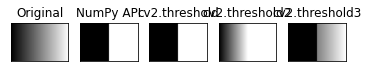

In [9]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img=cv2.imread('./img/gray_gradient.jpg',cv2.IMREAD_GRAYSCALE)

thresh_np=np.zeros_like(img)
thresh_np[img>127]=255

ret,thresh_cv=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
print(ret)
ret2,thresh_cv2=cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret3,thresh_cv3=cv2.threshold(img,127,255,cv2.THRESH_TOZERO)

imgs={'Original':img,'NumPy API':thresh_np,'cv2.threshold':thresh_cv,'cv2.threshold2':thresh_cv2,'cv2.threshold3':thresh_cv3}

for i,(key,value) in enumerate(imgs.items()):
    plt.subplot(1,5,i+1)
    plt.title(key)
    plt.imshow(value,cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()

### 오츠의 알고리즘

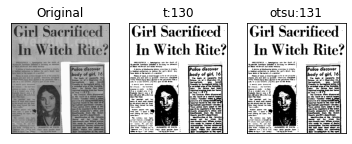

In [3]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img=cv2.imread('./img/scaned_paper.jpg',cv2.IMREAD_GRAYSCALE)

_,t_130=cv2.threshold(img,130,255,cv2.THRESH_BINARY)

t,t_otsu=cv2.threshold(img,-1,255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)

imgs={'Original': img,'t:130':t_130,'otsu:%d'%t: t_otsu}

for i,(key,value) in enumerate(imgs.items()):
    plt.subplot(1,3,i+1)
    plt.title(key)
    plt.imshow(value,cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()

### 적응형 스레시홀드

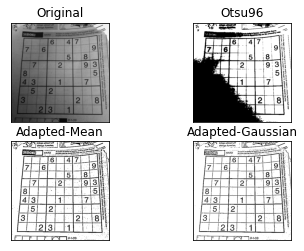

In [4]:
import cv2
import numpy as np
import matplotlib.pylab as plt

blk_size=9
C=5
img=cv2.imread('./img/sudoku.png',cv2.IMREAD_GRAYSCALE)

ret,th1=cv2.threshold(img,0,255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)

th2=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,blk_size,C)

th3=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,blk_size,C)

imgs={'Original': img,'Otsu%d'%ret:th1,'Adapted-Mean': th2,'Adapted-Gaussian':th3}

for i,(key,value) in enumerate(imgs.items()):
    plt.subplot(2,2,i+1)
    plt.title(key)
    plt.imshow(value,cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()

# 4.이미지 연산

### 연산

In [5]:
import cv2
import numpy as np
a=np.uint8([[200,50]])
b=np.uint8([[100,100]])

add1=a+b
sub1=a-b
multi1=a*2
div1=a/3

add2=cv2.add(a,b)
sub2=cv2.subtract(a,b)
multi2=cv2.multiply(a,2)
div2=cv2.divide(a,3)

print(add1,add2)
print(sub1,sub2)
print(multi1,multi2)
print(div1,div2)

[[ 44 150]] [[255 150]]
[[100 206]] [[100   0]]
[[144 100]] [[255 100]]
[[66.66666667 16.66666667]] [[67 17]]


In [9]:
import cv2
import numpy as np

a=np.uint8([[1,2]])
b=np.uint8([[10,20]])

mask=np.uint8([[1,0]])

c1=cv2.add(a,b,None,mask)
print(c1)
c2=cv2.add(a,b,b.copy(),mask)
print(c2)
print('before:',b)
c3=cv2.add(a,b,b,mask)
print(c3)
print('after:',b)

[[11  0]]
[[11 20]]
before: [[10 20]]
[[11 20]]
after: [[11 20]]


### 알파 블렌딩(이미지의 가중치 추가)

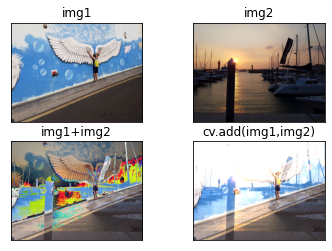

In [12]:
#단순 합성
import cv2
import numpy as np
import matplotlib.pylab as plt

img1=cv2.imread('./img/wing_wall.jpg')
img2=cv2.imread('./img/yate.jpg')

img3=img1+img2
img4=cv2.add(img1,img2)

imgs={'img1':img1,'img2':img2,'img1+img2':img3,'cv.add(img1,img2)':img4}

for i,(k,v) in enumerate(imgs.items()):
    plt.subplot(2,2,i+1)
    plt.imshow(v[:,:,::-1])
    plt.title(k)
    plt.xticks([])
    plt.yticks([])
plt.show()

In [18]:
#블렌딩 50%
import cv2
import numpy as np
import matplotlib.pylab as plt

alpha=0.5
img1=cv2.imread('./img/wing_wall.jpg')
img2=cv2.imread('./img/yate.jpg')

#직접 연산
blended=img1*alpha+img2*(1-alpha)
blended=blended.astype(np.uint8)
cv2.imshow('img1*alpha + img2*(1-alpha)',blended)

# 블렌딩 함수 사용
dst=cv2.addWeighted(img1,alpha,img2,(1-alpha),0)
cv2.imshow('cv2.addWeighted',dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

### fade in/out 기법

In [24]:
import cv2
import numpy as np

win_name='Alpha blending'
trackbar_name='fade'

# trackbar event function
def onChange(x):
    alpha=x/1000
    dst=cv2.addWeighted(img1,1-alpha,img2,alpha,0)
    cv2.imshow(win_name,dst)
    
img1=cv2.imread('./img/man_face.jpg')
img2=cv2.imread('./img/lion_face.jpg')
cv2.imshow(win_name,img1)
cv2.createTrackbar(trackbar_name,win_name,0,1000,onChange)# trackbar function

cv2.waitKey()
cv2.destroyAllWindows()

### bit-wise 연산

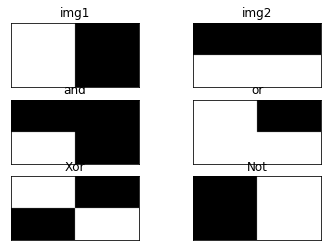

In [32]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img1=np.zeros((200,400),dtype=np.uint8)
img2=np.zeros((200,400),dtype=np.uint8)
img1[:,:200]=255
img2[100:200,:]=255

bitAnd=cv2.bitwise_and(img1,img2)
bitOr=cv2.bitwise_or(img1,img2)
bitXor=cv2.bitwise_xor(img1,img2)
bitNot=cv2.bitwise_not(img1)

imgs={'img1':img1,'img2':img2,'and':bitAnd,'or':bitOr,'Xor':bitXor,'Not':bitNot}

for i,(k,v) in enumerate(imgs.items()):
    plt.subplot(3,2,i+1)
    plt.title(k)
    plt.imshow(v,'gray')
    plt.xticks([])
    plt.yticks([])
plt.show()    

In [7]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img=cv2.imread('./img/girl.jpg')

# make circle
mask=np.zeros_like(img)
cv2.circle(mask,(200,100),100,(255,255,255),-1)

masked=cv2.bitwise_and(img,mask)

cv2.imshow('original',img)
cv2.imshow('circle',mask)
cv2.imshow('masked',masked)

cv2.waitKey()
cv2.destroyAllWindows()

### 차영상

In [5]:
import cv2
import numpy as np

img1=cv2.imread('./img/robot_arm1.jpg')
img2=cv2.imread('./img/robot_arm2.jpg')
img1_gray=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img2_gray=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

diff=cv2.absdiff(img1_gray,img2_gray)

_, diff=cv2.threshold(diff,1,255,cv2.THRESH_BINARY)
diff_red=cv2.cvtColor(diff,cv2.COLOR_GRAY2BGR)
diff_red[:,:,2]=0

spot=cv2.bitwise_xor(img2,diff_red)

cv2.imshow('img1',img1)
cv2.imshow('img2',img2)
cv2.imshow('diff',diff)
cv2.imshow('spot',spot)
cv2.waitKey()
cv2.destroyAllWindows()

### Manuplated image and masking

In [14]:
import cv2
import numpy as np

img_fg=cv2.imread('./img/opencv_logo.png',cv2.IMREAD_UNCHANGED)
img_bg=cv2.imread('./img/girl.jpg')

_,mask=cv2.threshold(img_fg[:,:,3],1,255,cv2.THRESH_BINARY)
mask_inv=cv2.bitwise_not(mask)

img_fg=cv2.cvtColor(img_fg,cv2.COLOR_BGRA2BGR)
h,w=img_fg.shape[:2]
roi=img_bg[10:10+h,10:10+w]

masked_fg=cv2.bitwise_and(img_fg,img_fg,mask=mask)
masked_bg=cv2.bitwise_and(roi,roi,mask=mask_inv)

added=masked_fg+masked_bg
img_bg[10:10+h,10:10+w]=added

cv2.imshow('mask',mask)
cv2.imshow('mask_inv',mask_inv)
cv2.imshow('masked_fg',masked_fg)
cv2.imshow('masked_bg',masked_bg)
cv2.imshow('added',added)
cv2.imshow('result',img_bg)

cv2.waitKey()
cv2.destroyAllWindows()

### HSV Masking

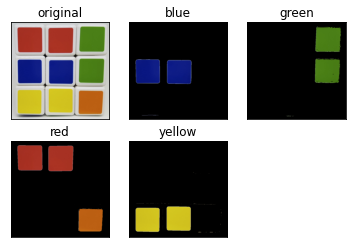

In [20]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img=cv2.imread('./img/cube.jpg')
hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

# create color to hsv
blue1=np.array([90,50,50])
blue2=np.array([120,255,255])
green1=np.array([45,50,50])
green2=np.array([75,255,255])
red1=np.array([0,50,50])
red2=np.array([15,255,255])
red3=np.array([165,50,50])
red4=np.array([180,255,255])
yellow1=np.array([20,50,50])
yellow2=np.array([35,255,255])

# create color masking 
mask_blue=cv2.inRange(hsv,blue1,blue2)
mask_green=cv2.inRange(hsv,green1,green2)
mask_red1=cv2.inRange(hsv,red1,red2)
mask_red2=cv2.inRange(hsv,red3,red4)
mask_yellow=cv2.inRange(hsv,yellow1,yellow2)

# extract masking per color
res_blue=cv2.bitwise_and(img,img,mask=mask_blue)
res_green=cv2.bitwise_and(img,img,mask=mask_green)
res_red1=cv2.bitwise_and(img,img,mask=mask_red1)
res_red2=cv2.bitwise_and(img,img,mask=mask_red2)
res_red=cv2.bitwise_or(res_red1,res_red2)
res_yellow=cv2.bitwise_and(img,img,mask=mask_yellow)

imgs={'original':img,'blue':res_blue,'green':res_green,'red':res_red,'yellow':res_yellow}

for i,(k,v) in enumerate(imgs.items()):
    plt.subplot(2,3,i+1)
    plt.title(k)
    plt.imshow(v[:,:,::-1])
    plt.xticks([])
    plt.yticks([])
plt.show()

### Chroma Key

In [1]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img1=cv2.imread('./img/man_chromakey.jpg')
img2=cv2.imread('./img/street.jpg')

# ROI
height1,width1=img1.shape[:2]
height2,width2=img2.shape[:2]
x=(width2-width1)//2
y=height2-height1
w=x+width1
h=y+height1

# chromkey 10 pixel 
chromakey=img1[:10,:10,:]
offset=20

hsv_chroma=cv2.cvtColor(chromakey,cv2.COLOR_BGR2HSV)
hsv_img=cv2.cvtColor(img1,cv2.COLOR_BGR2HSV)

chroma_h=hsv_chroma[:,:,0]
lower=np.array([chroma_h.min()-offset,100,100])
upper=np.array([chroma_h.max()+offset,255,255])

mask=cv2.inRange(hsv_img,lower,upper)
mask_inv=cv2.bitwise_not(mask)
roi=img2[y:h,x:w]
fg=cv2.bitwise_and(img1,img1,mask=mask_inv)
bg=cv2.bitwise_and(roi,roi,mask=mask)
img2[y:h,x:w]=fg+bg

cv2.imshow('chromakey',img1)
cv2.imshow('added',img2)
cv2.waitKey()
cv2.destroyAllWindows()

### manuplate 

In [2]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img1=cv2.imread('./img/drawing.jpg')
img2=cv2.imread('./img/my_hand.jpg')

mask=np.full_like(img1,255)

height,width=img2.shape[:2]
center=(width//2,height//2)

# manuplate to seamlessClone function
normal=cv2.seamlessClone(img1,img2,mask,center,cv2.NORMAL_CLONE)
mixed=cv2.seamlessClone(img1,img2,mask,center,cv2.MIXED_CLONE)

cv2.imshow('normal',normal)
cv2.imshow('mixed',mixed)
cv2.waitKey()
cv2.destroyAllWindows()

# 5.HISTOGRAM

(256, 1)
270000.0 (450, 600)


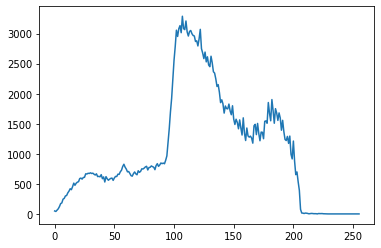

In [1]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img=cv2.imread('./img/mountain.jpg',cv2.IMREAD_GRAYSCALE)
cv2.imshow('img',img)

hist=cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist)

print(hist.shape)
print(hist.sum(),img.shape)
plt.show()
cv2.waitKey()
cv2.destroyAllWindows()

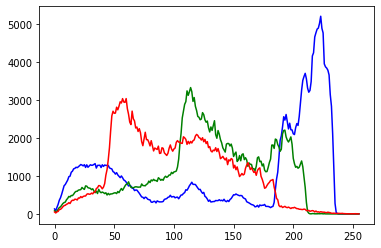

In [3]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img=cv2.imread('./img/mountain.jpg')
cv2.imshow('img',img)

channels=cv2.split(img)
colors=('b','g','r')

for (ch,color) in zip(channels,colors):
    hist=cv2.calcHist([ch],[0],None,[256],[0,256])
    plt.plot(hist,color=color)
plt.show()
cv2.waitKey()
cv2.destroyAllWindows()

### Normalize

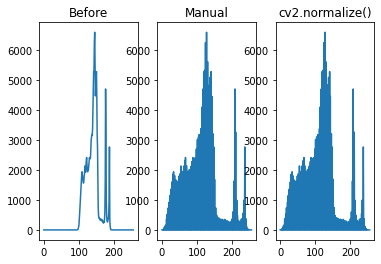

In [1]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img=cv2.imread('./img/abnormal.jpg',cv2.IMREAD_GRAYSCALE)

# 직접 연산
img_f=img.astype(np.float32)
img_norm=((img_f-img_f.min())*255 / (img_f.max()-img_f.min()))
img_norm=img_norm.astype(np.uint8)

# normalize function
img_norm2=cv2.normalize(img,None,0,255,cv2.NORM_MINMAX)

hist=cv2.calcHist([img],[0],None,[256],[0,255])
hist_norm=cv2.calcHist([img_norm],[0],None,[256],[0,255])
hist_norm2=cv2.calcHist([img_norm2],[0],None,[256],[0,255])

cv2.imshow('Before',img)
cv2.imshow('Manual',img_norm)
cv2.imshow('cv2.normalize()',img_norm2)

hists={'Before':hist,'Manual':hist_norm,'cv2.normalize()':hist_norm2}
for i,(k,v) in enumerate(hists.items()):
    plt.subplot(1,3,i+1)
    plt.title(k)
    plt.plot(v)
plt.show()
cv2.waitKey()
cv2.destroyAllWindows()

### Equalize

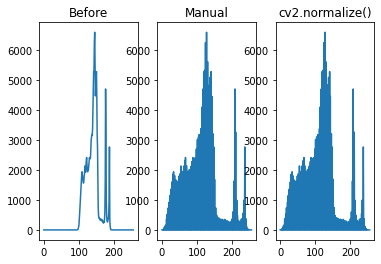

In [2]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img=cv2.imread('./img/yate.jpg',cv2.IMREAD_GRAYSCALE)
rows,cols=img.shape[:2]

# 직접 연산
hist=cv2.calcHist([img],[0],None,[256],[0,256])
cdf=hist.cumsum() # 누적 히스토그램
cdf_m=np.ma.masked_equal(cdf,0) # 0값을 NaN으로 제거
cdf_m=(cdf_m-cdf_m.min())/(rows*cols)*255
cdf=np.ma.filled(cdf_m,0).astype('uint8')
img2=cdf[img]


#equalize function
img3=cv2.equalizeHist(img)

hist2=cv2.calcHist([img2],[0],None,[256],[0,256])
hist3=cv2.calcHist([img3],[0],None,[256],[0,256])

cv2.imshow('Before',img)
cv2.imshow('Manual',img2)
cv2.imshow('cv2.equalizeHist()',img3)

for i,(k,v) in enumerate(hists.items()):
    plt.subplot(1,3,i+1)
    plt.title(k)
    plt.plot(v)
plt.show()
cv2.waitKey()
cv2.destroyAllWindows()

In [4]:
# for color image(YUV)
import numpy as np
import cv2

img=cv2.imread('./img/yate.jpg')

img_yuv=cv2.cvtColor(img,cv2.COLOR_BGR2YUV)

img_yuv[:,:,0]=cv2.equalizeHist(img_yuv[:,:,0])

img2=cv2.cvtColor(img_yuv,cv2.COLOR_YUV2BGR)

cv2.imshow('Before',img)
cv2.imshow('After',img2)
cv2.waitKey()
cv2.destroyAllWindows()

### CLAHE(Contrast Limiting Adaptive Histogram Equalization)

In [11]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img=cv2.imread('./img/bright.jpg')
img_yuv=cv2.cvtColor(img,cv2.COLOR_BGR2YUV)

# apply equalization to bright channel
img_eq=img_yuv.copy()
img_eq[:,:,0]=cv2.equalizeHist(img_eq[:,:,0])
img_eq=cv2.cvtColor(img_eq,cv2.COLOR_YUV2BGR)

# apply clahe to bright channel
img_clahe=img_yuv.copy()
clahe=cv2.createCLAHE(clipLimit=4.0,tileGridSize=(8,8))
img_clahe[:,:,0]=clahe.apply(img_clahe[:,:,0])
img_clahe=cv2.cvtColor(img_clahe,cv2.COLOR_YUV2BGR)

cv2.imshow('Before',img)
cv2.imshow('CLAHE',img_clahe)
cv2.imshow('equalizeHist',img_eq)
cv2.waitKey()
cv2.destroyAllWindows()

### 2D Histogram

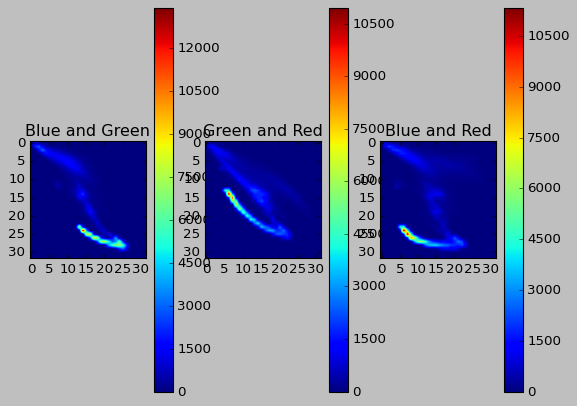

In [13]:
import cv2
import matplotlib.pylab as plt

plt.style.use('classic')
img=cv2.imread('./img/mountain.jpg')

plt.subplot(131)
hist=cv2.calcHist([img],[0,1],None,[32,32],[0,256,0,256])
p=plt.imshow(hist)
plt.title('Blue and Green')
plt.colorbar(p)

plt.subplot(132)
hist=cv2.calcHist([img],[1,2],None,[32,32],[0,256,0,256])
p=plt.imshow(hist)
plt.title('Green and Red')
plt.colorbar(p)

plt.subplot(133)
hist=cv2.calcHist([img],[0,2],None,[32,32],[0,256,0,256])
p=plt.imshow(hist)
plt.title('Blue and Red')
plt.colorbar(p)

plt.show()

###  역투영 (마우스로 선택한 영역의 물체 배경 제거)

In [2]:
import cv2
import numpy as np
import matplotlib.pylab as plt

win_name='back_projection'
img=cv2.imread('./img/pump_horse.jpg')
hsv_img=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
draw=img.copy()

def masking(bp,win_name):
    disc=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    cv2.filter2D(bp,-1,disc,bp)
    _,mask=cv2.threshold(bp,1,255,cv2.THRESH_BINARY)
    result=cv2.bitwise_and(img,img,mask=mask)
    cv2.imshow(win_name,result)
    
# 직접 구현
def backProject_manual(hist_roi):
    hist_img=cv2.calcHist([hsv_img],[0,1],None,[180,256],[0,180,0,256])
    hist_rate=hist_roi/(hist_img+1)
    h,s,v=cv2.split(hsv_img)
    bp=hist_rate[h.ravel(),s.ravel()]
    bp=np.minimum(bp,1)
    bp=bp.reshape(hsv_img.shape[:2])
    cv2.normalize(bp,bp,0,255,cv2.NORM_MINMAX)
    bp=bp.astype(np.uint8)
    masking(bp,'result_manual')

# function
def backProject_cv(hist_roi):
    bp=cv2.calcBackProject([hsv_img],[0,1],hist_roi,[0,180,0,256],1)
    masking(bp,'result_manual')
    
#ROI
(x,y,w,h)=cv2.selectROI(win_name,img,False)
if w>0 and h>0:
    roi=draw[y:y+h,x:x+w]
    cv2.rectangle(draw,(x,y),(x+w,y+h),(0,0,255),2)
    hsv_roi=cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)
    hist_roi=cv2.calcHist([hsv_roi],[0,1],None,[180,256],[0,180,0,256])
    backProject_manual(hist_roi)
    backProject_cv(hist_roi)

cv2.imshow(win_name,draw)
cv2.waitKey()
cv2.destroyAllWindows()

### Compare Histogram

CORREL    	img1:   1.00	
img2:   0.70	
img3:   0.56	
img4:   0.23	
CHISQR    	img1:   0.00	
img2:  67.33	
img3:  35.71	
img4:1129.49	
INTERACT  	img1:   1.00	
img2:   0.54	
img3:   0.40	
img4:   0.18	
BHATTACHARYYA	img1:   0.00	
img2:   0.48	
img3:   0.47	
img4:   0.79	


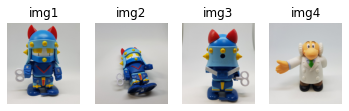

In [1]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img1=cv2.imread('./img/taekwonv1.jpg')
img2=cv2.imread('./img/taekwonv2.jpg')
img3=cv2.imread('./img/taekwonv3.jpg')
img4=cv2.imread('./img/dr_ochanomizu.jpg')

cv2.imshow('query',img1)
imgs=[img1,img2,img3,img4]
hists=[]
for i,img in enumerate(imgs):
    plt.subplot(1,len(imgs),i+1)
    plt.title('img%d'%(i+1))
    plt.axis('off')
    plt.imshow(img[:,:,::-1])
    hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    hist=cv2.calcHist([hsv],[0,1],None,[180,256],[0,180,0,256])
    cv2.normalize(hist,hist,0,1,cv2.NORM_MINMAX)
    hists.append(hist)
    
query=hists[0]
methods={'CORREL':cv2.HISTCMP_CORREL,'CHISQR':cv2.HISTCMP_CHISQR,'INTERACT':cv2.HISTCMP_INTERSECT,
        'BHATTACHARYYA':cv2.HISTCMP_BHATTACHARYYA}

for j,(name,flag) in enumerate(methods.items()):
    print('%-10s'%name,end='\t')
    for i,(hist,img) in enumerate(zip(hists,imgs)):
        ret=cv2.compareHist(query,hist,flag)
        if flag==cv2.HISTCMP_INTERSECT:
            ret=ret/np.sum(query)
        print('img%d:%7.2f'%(i+1,ret),end='\t')
        print()
plt.show()
cv2.waitKey()
cv2.destroyAllWindows()

## Manuplate face and skeleton 

In [4]:
import cv2
import numpy as np

alpha_width_rate=15

img_face=cv2.imread('./img/man_face.jpg')
img_skull=cv2.imread('./img/skull.jpg')

img_comp=np.zeros_like(img_face)

height,width=img_face.shape[:2]
middle=width//2
alpha_width=width*alpha_width_rate//100
start=middle-alpha_width//2
step=100/alpha_width

img_comp[:,:middle,:]=img_face[:,:middle,:].copy()
img_comp[:,middle:,:]=img_skull[:,middle:,:].copy()
cv2.imshow('half',img_comp)

for i in range(alpha_width+1):
    alpha=(100-step*i)/100
    beta=1-alpha
    img_comp[:,start+i]=img_face[:,start+i]*alpha+img_skull[:,start+i]*beta
    print(i,alpha,beta)

cv2.imshow('half skull',img_comp)
cv2.waitKey()
cv2.destroyAllWindows()

0 1.0 0.0
1 0.9895833333333333 0.01041666666666674
2 0.9791666666666667 0.02083333333333326
3 0.96875 0.03125
4 0.9583333333333333 0.04166666666666674
5 0.9479166666666667 0.05208333333333326
6 0.9375 0.0625
7 0.9270833333333333 0.07291666666666674
8 0.9166666666666667 0.08333333333333326
9 0.90625 0.09375
10 0.8958333333333333 0.10416666666666674
11 0.8854166666666667 0.11458333333333326
12 0.875 0.125
13 0.8645833333333333 0.13541666666666674
14 0.8541666666666667 0.14583333333333326
15 0.84375 0.15625
16 0.8333333333333333 0.16666666666666674
17 0.8229166666666665 0.17708333333333348
18 0.8125 0.1875
19 0.8020833333333333 0.19791666666666674
20 0.7916666666666665 0.20833333333333348
21 0.78125 0.21875
22 0.7708333333333333 0.22916666666666674
23 0.7604166666666665 0.23958333333333348
24 0.75 0.25
25 0.7395833333333333 0.26041666666666674
26 0.7291666666666665 0.2708333333333335
27 0.71875 0.28125
28 0.7083333333333333 0.29166666666666674
29 0.6979166666666665 0.3020833333333335
30 0

## CCTV motion detected

In [1]:
import cv2
import numpy as np

thresh=25
max_diff=5

a,b,c=None,None,None
cap=cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH,480)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT,320)

if cap.isOpened():
    ret,a=cap.read()
    ret,b=cap.read()
    
    while ret:
        ret,c=cap.read()
        draw=c.copy()
        if not ret:
            break
            
        a_gray=cv2.cvtColor(a,cv2.COLOR_BGR2GRAY)
        b_gray=cv2.cvtColor(b,cv2.COLOR_BGR2GRAY)
        c_gray=cv2.cvtColor(c,cv2.COLOR_BGR2GRAY)
        
        diff1=cv2.absdiff(a_gray,b_gray)
        diff2=cv2.absdiff(b_gray,c_gray)
        
        ret,diff1_t=cv2.threshold(diff1,thresh,255,cv2.THRESH_BINARY)
        ret,diff2_t=cv2.threshold(diff2,thresh,255,cv2.THRESH_BINARY)
        
        diff=cv2.bitwise_and(diff1_t,diff2_t)
        
        # elimanate noise
        k=cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
        diff=cv2.morphologyEx(diff,cv2.MORPH_OPEN,k)
        
        diff_cnt=cv2.countNonZero(diff)
        if diff_cnt>max_diff:
            nzero=np.nonzero(diff)
            cv2.rectangle(draw,(min(nzero[1]),min(nzero[0])),(max(nzero[1]),max(nzero[1])),(0,255,0),2)
            cv2.putText(draw,"Motion Detected",(10,30),cv2.FONT_HERSHEY_DUPLEX,0.5,(0,0,255))
            
        stacked=np.hstack((draw,cv2.cvtColor(diff,cv2.COLOR_GRAY2BGR)))
        cv2.imshow('motion sensor',stacked)
        
        a=b
        b=c
        
        if cv2.waitKey(1)*0xFF==27:
            break

KeyboardInterrupt: 